In [34]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')
# change directory
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/Cognizant NPN')
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
CDR-Call-Details.csv	 EDA_Biswajit.ipynb		  templates
checking_cog_proj.ipynb  scaler.pkl			  top3_tariff.csv
ChurnWebApp		 Tariff_price_prediction.ipynb
customer_usage.csv	 tariff_recommendation_model.pkl


In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [36]:

df = pd.read_csv("CDR-Call-Details.csv")
df.head()

,Phone Number,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,382-4657,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,371-7191,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,358-1921,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,375-9999,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,330-6626,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [37]:
df.shape

(101174, 17)

In [38]:
# NUll value check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101174 entries, 0 to 101173
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Phone Number    101174 non-null  object 
 1   Account Length  101174 non-null  int64  
 2   VMail Message   101174 non-null  int64  
 3   Day Mins        101174 non-null  float64
 4   Day Calls       101174 non-null  int64  
 5   Day Charge      101174 non-null  float64
 6   Eve Mins        101174 non-null  float64
 7   Eve Calls       101174 non-null  int64  
 8   Eve Charge      101174 non-null  float64
 9   Night Mins      101174 non-null  float64
 10  Night Calls     101174 non-null  int64  
 11  Night Charge    101174 non-null  float64
 12  Intl Mins       101174 non-null  float64
 13  Intl Calls      101174 non-null  int64  
 14  Intl Charge     101174 non-null  float64
 15  CustServ Calls  101174 non-null  int64  
 16  Churn           101174 non-null  bool   
dtypes: bool(1)

In [39]:
df.columns

Index(['Phone Number', 'Account Length', 'VMail Message', 'Day Mins',
       'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge',
       'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls',
       'Intl Charge', 'CustServ Calls', 'Churn'],
      dtype='object')

In [40]:
df["Churn"]=df["Churn"].astype(int)

In [41]:
df["Churn"].dtype

dtype('int64')

In [42]:
ch_count=df["Churn"].value_counts()
ch_count

,count
Churn,
0,90642
1,10532


In [43]:
ch_count=df["Churn"].value_counts(normalize=True)
ch_count

,proportion
Churn,
0,0.895902
1,0.104098


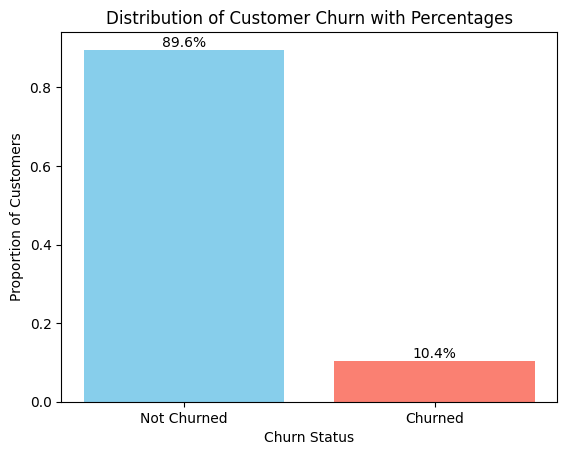

In [67]:
ch_count = df["Churn"].value_counts(normalize=True)

# Create the bar plot
bars = plt.bar(ch_count.index, ch_count.values, color=['skyblue', 'salmon'])
plt.title('Distribution of Customer Churn with Percentages')
plt.xlabel('Churn Status')
plt.ylabel('Proportion of Customers')
# Use more descriptive labels and remove rotation
plt.xticks(ticks=[0, 1], labels=['Not Churned', 'Churned'], rotation=0)

# Add percentages on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1%}', va='bottom', ha='center') # va: vertical alignment, ha: horizontal alignment

plt.show()

In [45]:
df.describe()

,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
count,101174.000000,101174.000000,101174.000000,101174.000000,101174.000000,101174.000000,101174.000000,101174.000000,101174.000000,101174.000000,101174.000000,101174.000000,101174.000000,101174.000000,101174.000000,101174.000000
mean,323.597149,18.142645,587.080798,267.207613,64.958811,655.512526,267.166930,34.358125,646.786643,261.673187,13.900142,20.291269,5.737798,4.347635,2.559640,0.104098
std,1418.073651,75.826932,2193.094319,947.963370,133.515808,2473.445436,932.914437,36.248577,2368.028491,884.963021,16.178685,25.033214,8.196367,2.761911,2.401904,0.305389
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.300000,20.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,69.000000,0.000000,222.300000,88.000000,23.920000,223.300000,88.000000,22.220000,223.200000,88.000000,6.220000,8.800000,2.000000,2.280000,2.000000,0.000000
50%,202.000000,0.000000,262.200000,202.000000,32.600000,268.200000,202.000000,24.440000,268.200000,202.000000,9.220000,20.200000,4.000000,2.920000,2.000000,0.000000
75%,240.000000,22.000000,326.275000,224.000000,82.200000,329.200000,224.000000,32.020000,329.200000,224.000000,20.440000,22.800000,8.000000,4.940000,3.000000,0.000000
max,21111.000000,1111.000000,111111.110000,21111.000000,1111.990000,111111.200000,21111.000000,211.990000,111111.110000,21111.000000,211.920000,211.900000,211.000000,11.920000,11.000000,1.000000


In [46]:
df["Phone Number"].describe()

,Phone Number
count,101174
unique,7467
top,985-9789
freq,124


In [47]:
Ph_count=df["Phone Number"].value_counts()
Ph_count.head(20)

,count
Phone Number,
985-9789,124
798-7989,108
798-5978,108
755-9997,108
759-9995,95
779-9985,92
799-9997,92
757-5557,87
778-9975,87


In [48]:
Ph_count.tail(10)

,count
Phone Number,
371-7191,1
358-1921,1
375-9999,1
330-6626,1
391-8027,1
355-9993,1
329-9001,1
335-4719,1
330-8173,1


In [49]:
Ph_count.index

Index(['985-9789', '798-7989', '798-5978', '755-9997', '759-9995', '779-9985',
       '799-9997', '757-5557', '778-9975', '776-5988',
       ...
       '371-7191', '358-1921', '375-9999', '330-6626', '391-8027', '355-9993',
       '329-9001', '335-4719', '330-8173', '329-6603'],
      dtype='object', name='Phone Number', length=7467)

In [50]:
Ph_count.values

array([124, 108, 108, ...,   1,   1,   1])

This is happening because the bar graph is trying to plot a separate bar for every single unique phone number (over 7000 of them) along the x-axis. With so many bars squeezed into the plot, the individual bars, especially those with higher counts which are fewer, become very thin and difficult to distinguish. The plot is essentially showing the distribution, but it's visually compressed.

To improve this, we should use visualizations that are better suited for data with a large number of unique categories:

Histogram of Counts (cell a905925a): This plot shows how many phone numbers have a certain number of occurrences. It gives a clear picture of the frequency of different counts.
Bar Plot of Top N Phone Numbers: We can create a bar plot showing only the top 10, 20, or 50 most frequent phone numbers. This focuses on the phone numbers with the highest counts and makes the bars clearly visible.

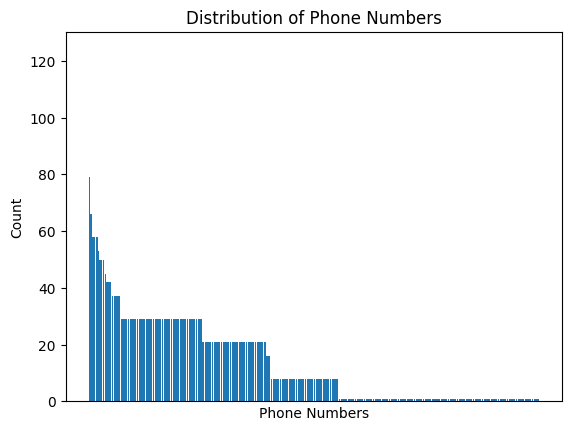

In [68]:
plt.bar(Ph_count.index, Ph_count.values)
plt.xlabel("Phone Numbers")
plt.ylabel("Count")
plt.title("Distribution of Phone Numbers")
plt.xticks([]) # Hide x-axis labels as there are too many unique phone numbers
plt.show()

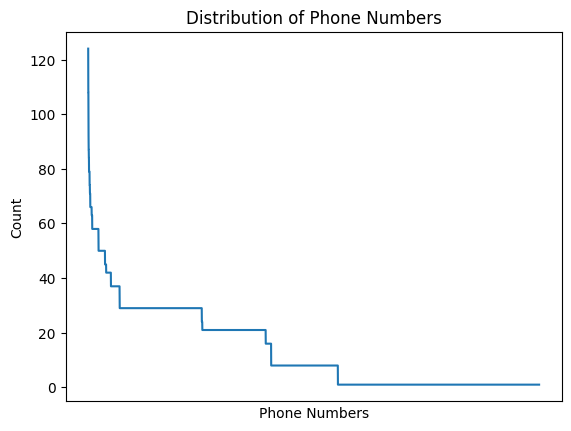

In [69]:
plt.plot(Ph_count)
plt.xlabel("Phone Numbers")
plt.ylabel("Count")
plt.title("Distribution of Phone Numbers")
plt.xticks([])
plt.show()

Direct Proportionality: The strong linear relationship between 'Day Mins' and 'Day Charge' in the first plot suggests that the charge is directly proportional to the duration of the calls. This is expected if there's a fixed rate per minute for day calls.
Discrete Pricing or Rounding: The appearance of distinct horizontal lines in the scatter plots might indicate that the 'Day Charge' values are rounded to certain increments or that there are specific pricing tiers based on minutes or calls. This would cause the data points to cluster along these specific charge values.
Outliers: The presence of outliers with very high 'Day Mins', 'Day Calls', and 'Day Charge' values (as seen in the box plots in cell f33a4ab1) can stretch the axes and make the main cluster of data points appear more compressed, contributing to the visual pattern.
Relationship with Calls: While 'Day Mins' has a stronger linear relationship with 'Day Charge', 'Day Calls' also shows some relationship, but it might not be as directly proportional as minutes. The pattern in the 'Day Calls' vs 'Day Charge' plot could be influenced by how calls of different durations are priced or bundled.

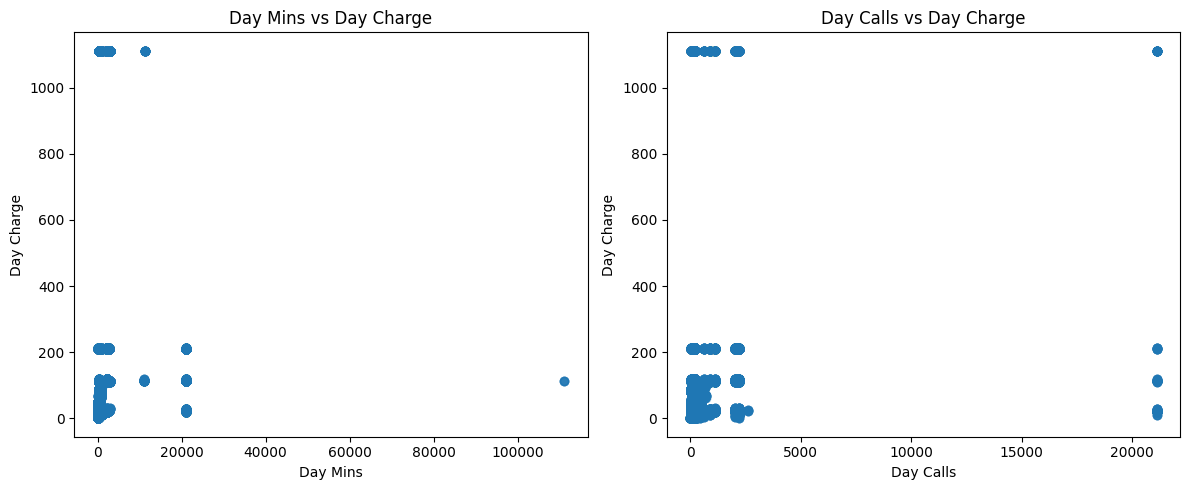

In [53]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
plt.scatter(df['Day Mins'], df['Day Charge'], alpha=0.5)
plt.xlabel('Day Mins')
plt.ylabel('Day Charge')
plt.title('Day Mins vs Day Charge')

plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
plt.scatter(df['Day Calls'], df['Day Charge'], alpha=0.5)
plt.xlabel('Day Calls')
plt.ylabel('Day Charge')
plt.title('Day Calls vs Day Charge')

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

Median: The line inside the box represents the median (50th percentile) of the data. This gives us a sense of the typical value for each variable.
Interquartile Range (IQR): The box itself represents the IQR, which is the range between the first quartile (25th percentile) and the third quartile (75th percentile). This shows us the spread of the middle 50% of the data.
Whiskers: The lines extending from the box (the whiskers) typically show the range of the data within 1.5 times the IQR from the box.
Outliers: The individual points beyond the whiskers are considered outliers. These are values that are significantly different from the rest of the data.

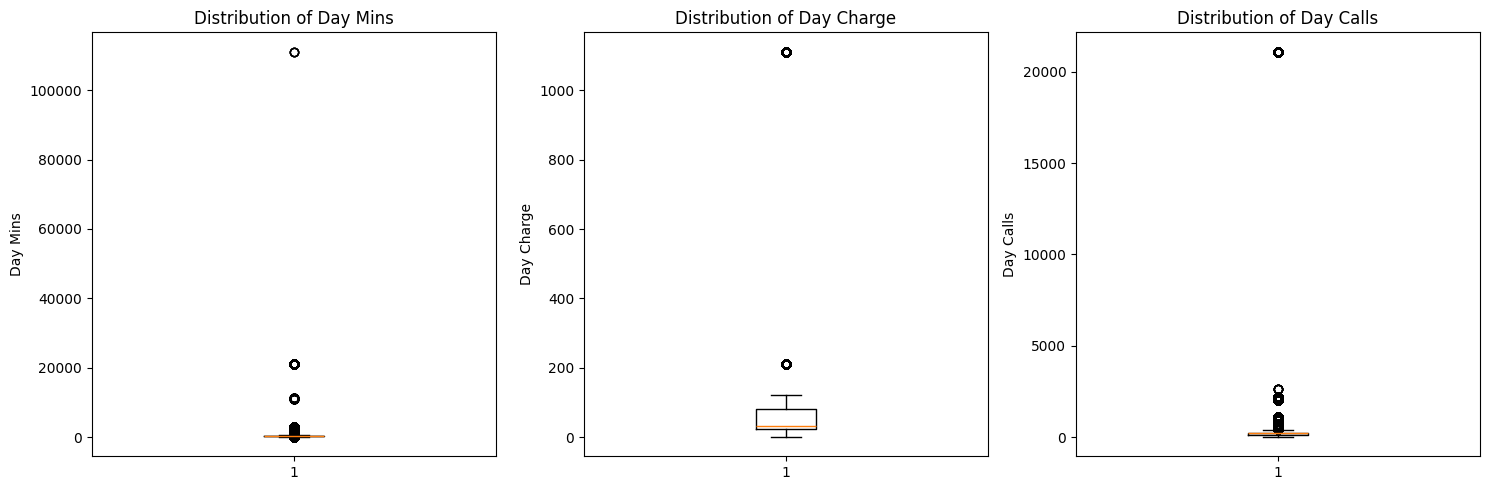

In [58]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.boxplot(df['Day Mins'])
plt.title('Distribution of Day Mins')
plt.ylabel('Day Mins')

plt.subplot(1, 3, 2)
plt.boxplot(df['Day Charge'])
plt.title('Distribution of Day Charge')
plt.ylabel('Day Charge')

plt.subplot(1, 3, 3)
plt.boxplot(df['Day Calls'])
plt.title('Distribution of Day Calls')
plt.ylabel('Day Calls')

plt.tight_layout()
plt.show()

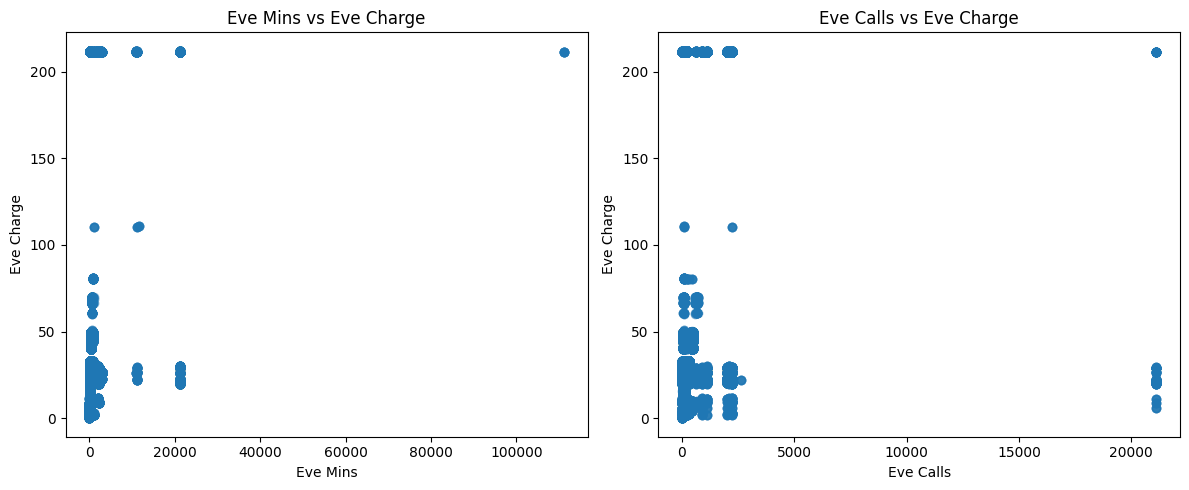

In [54]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
plt.scatter(df['Eve Mins'], df['Eve Charge'], alpha=0.5)
plt.xlabel('Eve Mins')
plt.ylabel('Eve Charge')
plt.title('Eve Mins vs Eve Charge')

plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
plt.scatter(df['Eve Calls'], df['Eve Charge'], alpha=0.5)
plt.xlabel('Eve Calls')
plt.ylabel('Eve Charge')
plt.title('Eve Calls vs Eve Charge')

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

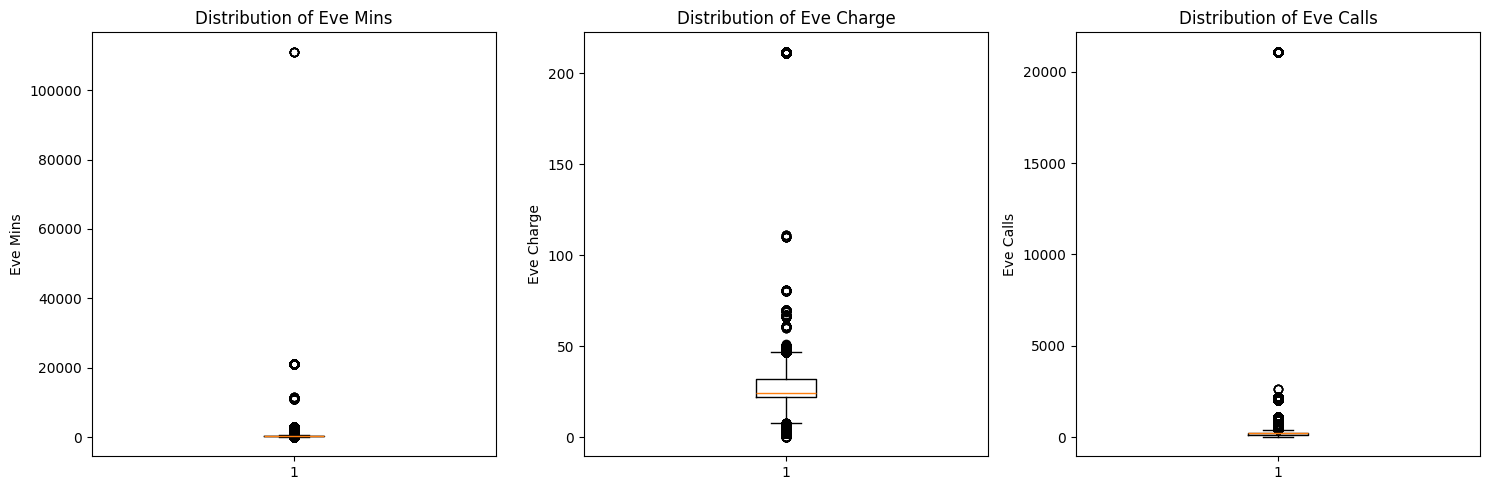

In [70]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.boxplot(df['Eve Mins'])
plt.title('Distribution of Eve Mins')
plt.ylabel('Eve Mins')

plt.subplot(1, 3, 2)
plt.boxplot(df['Eve Charge'])
plt.title('Distribution of Eve Charge')
plt.ylabel('Eve Charge')

plt.subplot(1, 3, 3)
plt.boxplot(df['Eve Calls'])
plt.title('Distribution of Eve Calls')
plt.ylabel('Eve Calls')

plt.tight_layout()
plt.show()

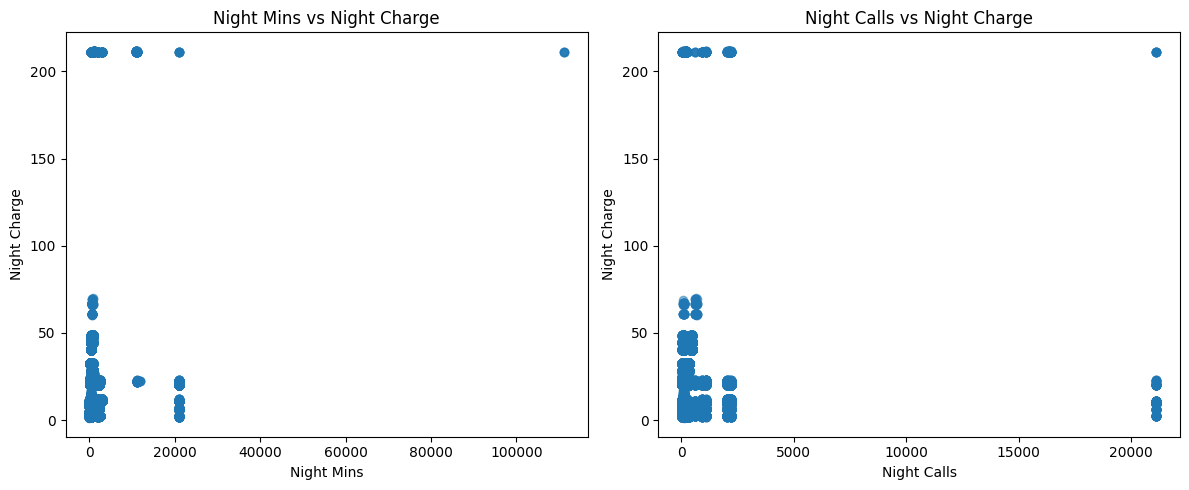

In [55]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
plt.scatter(df['Night Mins'], df['Night Charge'], alpha=0.5)
plt.xlabel('Night Mins')
plt.ylabel('Night Charge')
plt.title('Night Mins vs Night Charge')

plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
plt.scatter(df['Night Calls'], df['Night Charge'], alpha=0.5)
plt.xlabel('Night Calls')
plt.ylabel('Night Charge')
plt.title('Night Calls vs Night Charge')

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

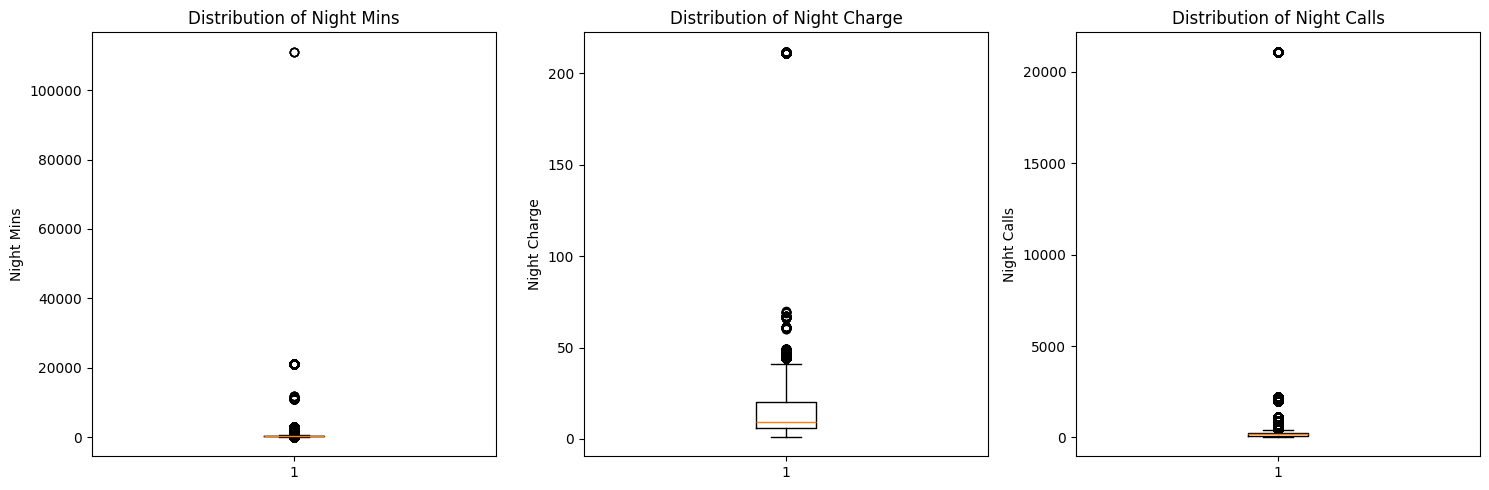

In [71]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.boxplot(df['Night Mins'])
plt.title('Distribution of Night Mins')
plt.ylabel('Night Mins')

plt.subplot(1, 3, 2)
plt.boxplot(df['Night Charge'])
plt.title('Distribution of Night Charge')
plt.ylabel('Night Charge')

plt.subplot(1, 3, 3)
plt.boxplot(df['Night Calls'])
plt.title('Distribution of Night Calls')
plt.ylabel('Night Calls')

plt.tight_layout()
plt.show()

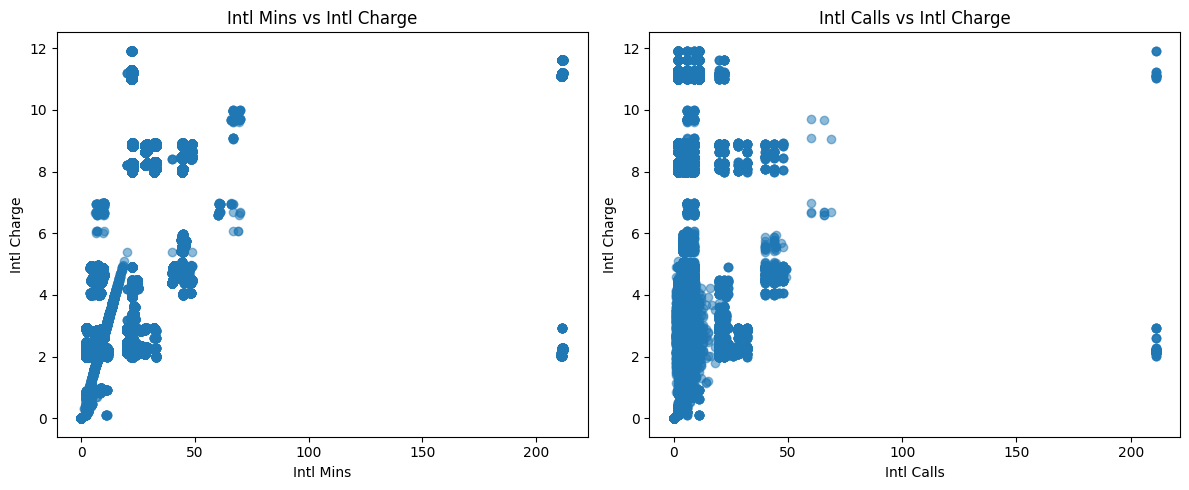

In [56]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
plt.scatter(df['Intl Mins'], df['Intl Charge'], alpha=0.5)
plt.xlabel('Intl Mins')
plt.ylabel('Intl Charge')
plt.title('Intl Mins vs Intl Charge')

plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
plt.scatter(df['Intl Calls'], df['Intl Charge'], alpha=0.5)
plt.xlabel('Intl Calls')
plt.ylabel('Intl Charge')
plt.title('Intl Calls vs Intl Charge')

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

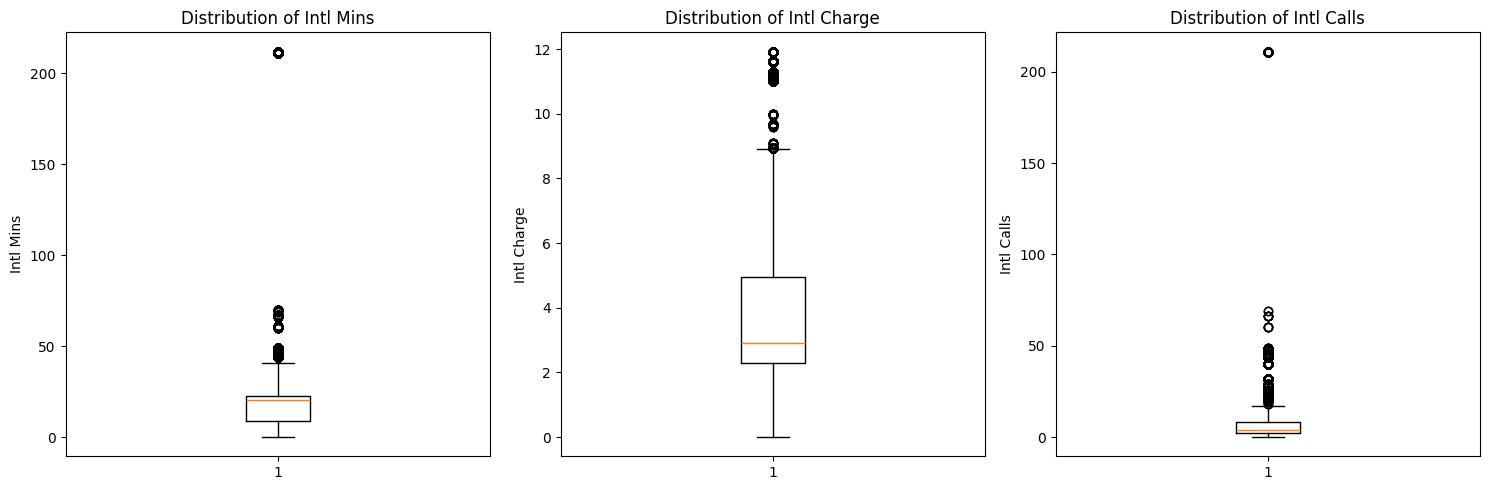

In [72]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.boxplot(df['Intl Mins'])
plt.title('Distribution of Intl Mins')
plt.ylabel('Intl Mins')

plt.subplot(1, 3, 2)
plt.boxplot(df['Intl Charge'])
plt.title('Distribution of Intl Charge')
plt.ylabel('Intl Charge')

plt.subplot(1, 3, 3)
plt.boxplot(df['Intl Calls'])
plt.title('Distribution of Intl Calls')
plt.ylabel('Intl Calls')

plt.tight_layout()
plt.show()

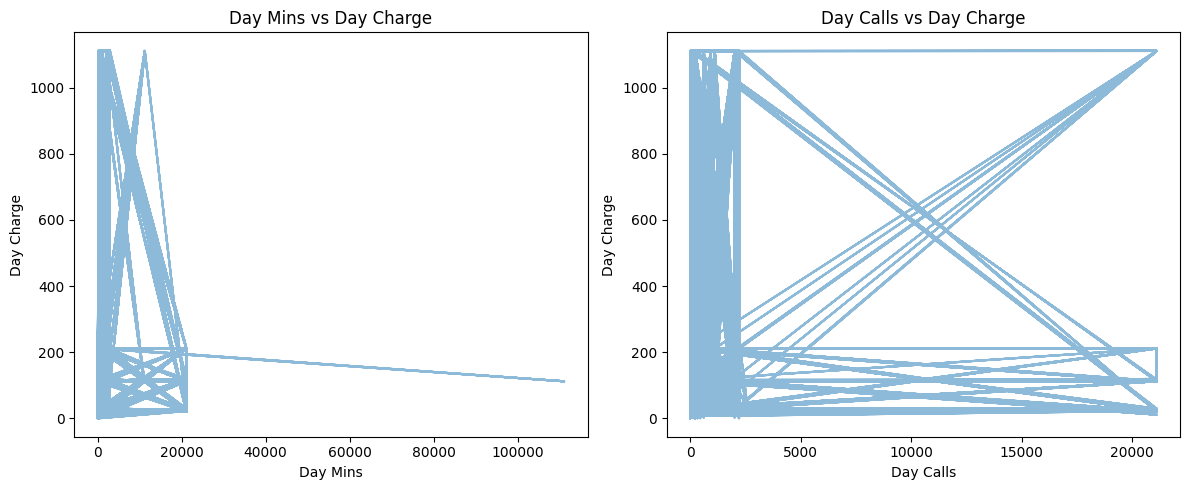

In [57]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
plt.plot(df['Day Mins'], df['Day Charge'], alpha=0.5)
plt.xlabel('Day Mins')
plt.ylabel('Day Charge')
plt.title('Day Mins vs Day Charge')

plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
plt.plot(df['Day Calls'], df['Day Charge'], alpha=0.5)
plt.xlabel('Day Calls')
plt.ylabel('Day Charge')
plt.title('Day Calls vs Day Charge')

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

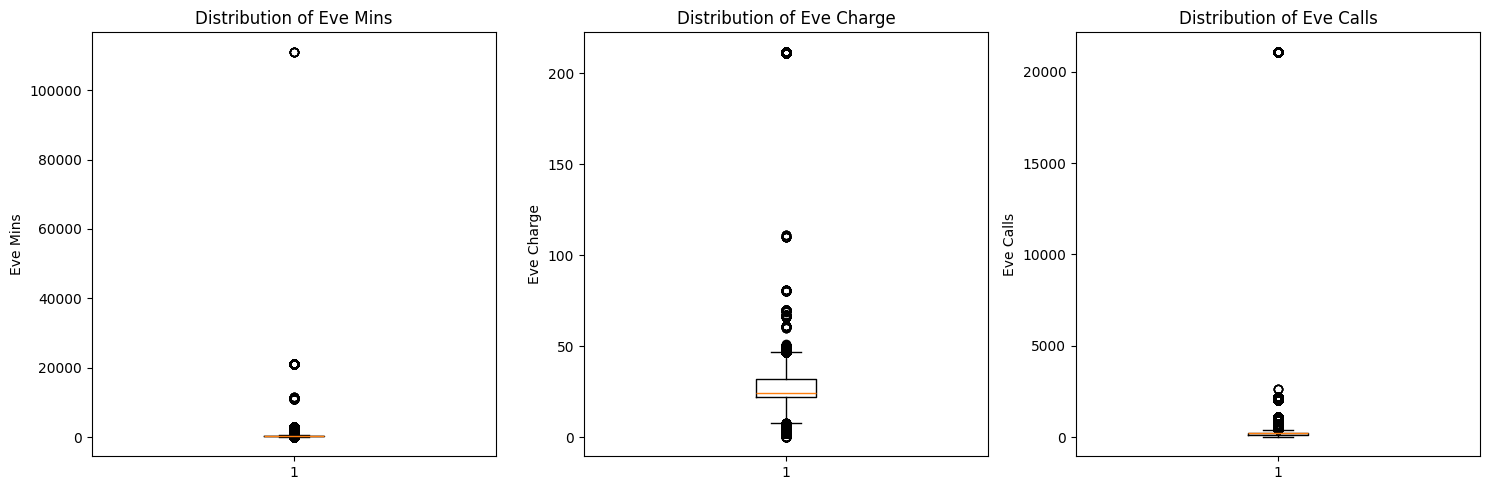

In [59]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.boxplot(df['Eve Mins'])
plt.title('Distribution of Eve Mins')
plt.ylabel('Eve Mins')

plt.subplot(1, 3, 2)
plt.boxplot(df['Eve Charge'])
plt.title('Distribution of Eve Charge')
plt.ylabel('Eve Charge')

plt.subplot(1, 3, 3)
plt.boxplot(df['Eve Calls'])
plt.title('Distribution of Eve Calls')
plt.ylabel('Eve Calls')

plt.tight_layout()
plt.show()

In [60]:
df2=df.copy()

In [61]:
# Select the column for which you want to detect outliers
column =['Day Mins','Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge',
       'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls',
       'Intl Charge']

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
print(outliers)
# Remove rows with outliers
df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


       Phone Number  Account Length  VMail Message  Day Mins  Day Calls  \
0               NaN             NaN            NaN       NaN        NaN   
1               NaN             NaN            NaN       NaN        NaN   
2               NaN             NaN            NaN       NaN        NaN   
3               NaN             NaN            NaN       NaN        NaN   
4               NaN             NaN            NaN       NaN        NaN   
...             ...             ...            ...       ...        ...   
101169          NaN             NaN            NaN       NaN        NaN   
101170          NaN             NaN            NaN       NaN        NaN   
101171          NaN             NaN            NaN       NaN        NaN   
101172          NaN             NaN            NaN       NaN        NaN   
101173          NaN             NaN            NaN       NaN        NaN   

        Day Charge  Eve Mins  Eve Calls  Eve Charge  Night Mins  Night Calls  \
0              NaN 

In [62]:
df_cleaned.head()

,Phone Number,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,NaN,NaN,NaN,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91.0,11.01,10.0,3.0,2.70,NaN,NaN
1,NaN,NaN,NaN,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,NaN,NaN
2,NaN,NaN,NaN,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,NaN,NaN
3,NaN,NaN,NaN,299.4,71.0,50.90,NaN,88.0,NaN,196.9,89.0,8.86,6.6,7.0,1.78,NaN,NaN
4,NaN,NaN,NaN,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,NaN,NaN


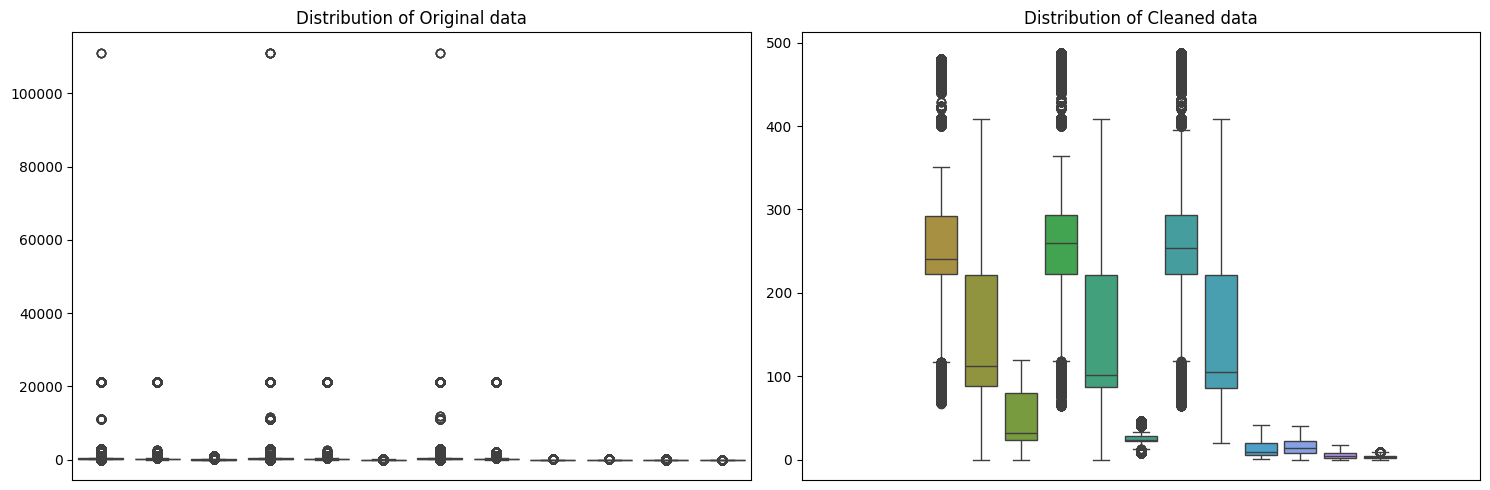

In [63]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(df[column])
plt.xticks([])
plt.title("Distribution of Original data")
plt.subplot(1, 2, 2)
sns.boxplot(df_cleaned)
plt.xticks([])
plt.title('Distribution of Cleaned data')
plt.tight_layout()
plt.show()

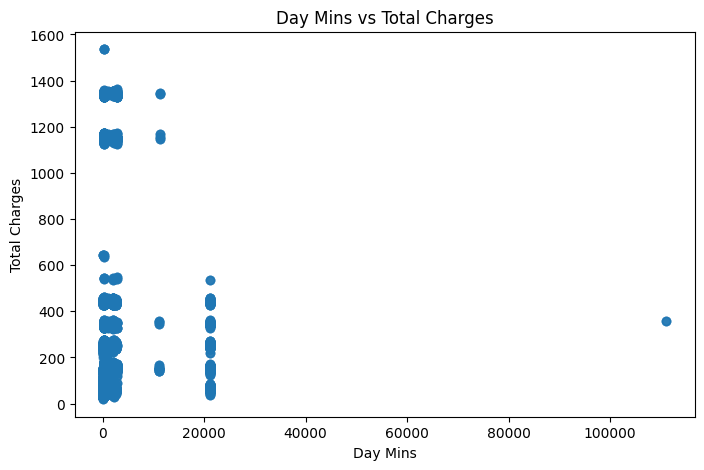

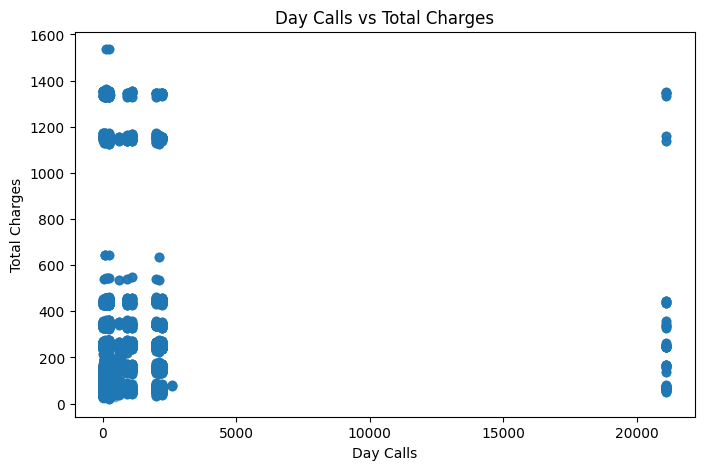

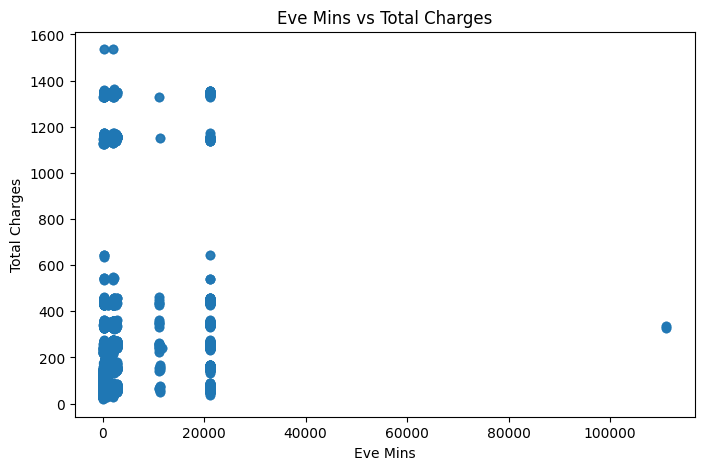

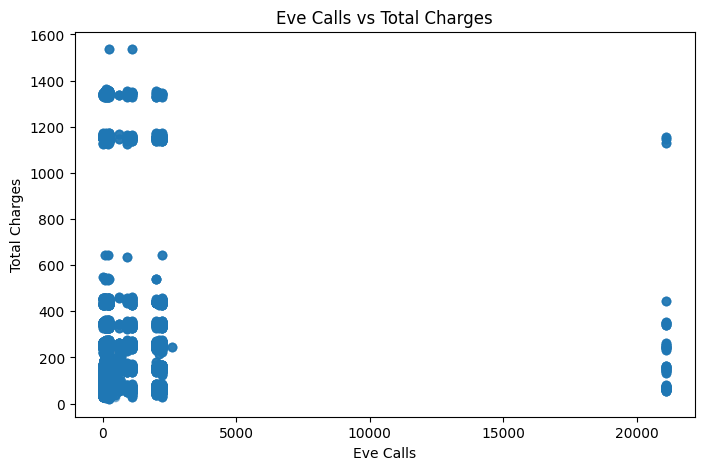

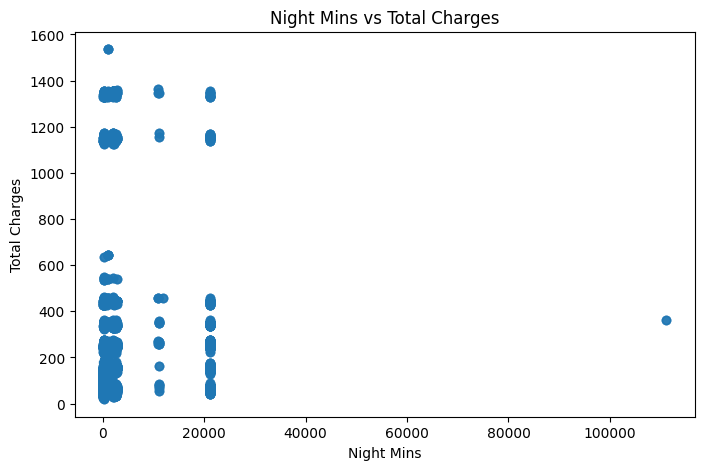

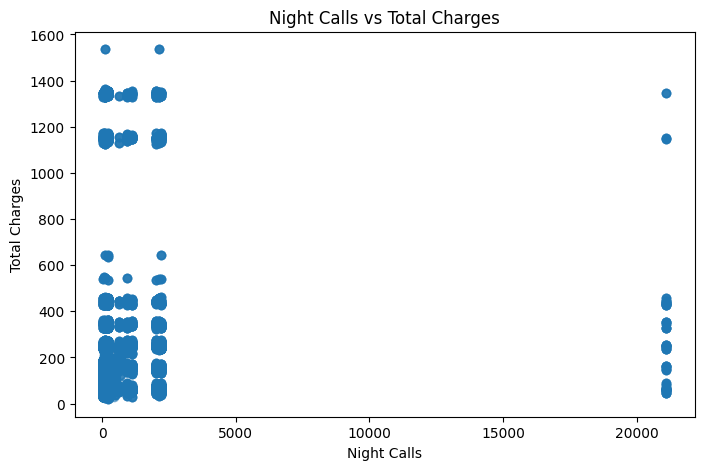

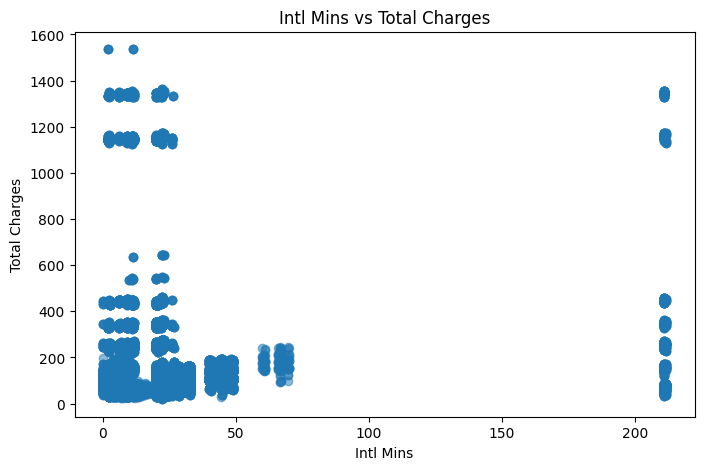

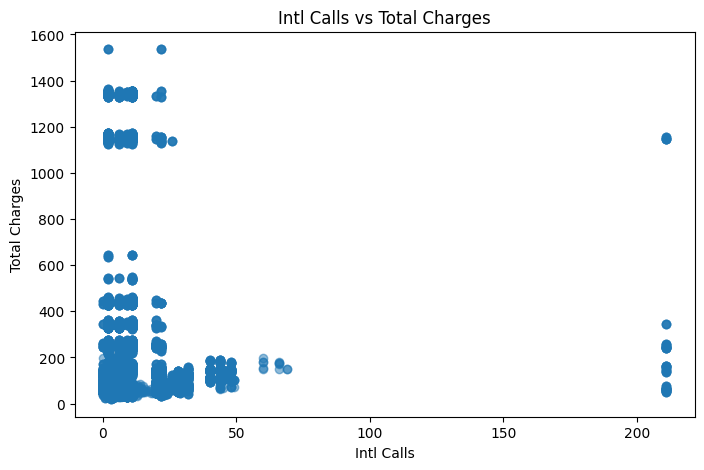

In [64]:
df['Total Charges'] = df['Day Charge'] + df['Eve Charge'] + df['Night Charge'] + df['Intl Charge']

mins_calls_cols = ['Day Mins', 'Day Calls', 'Eve Mins', 'Eve Calls', 'Night Mins', 'Night Calls', 'Intl Mins', 'Intl Calls']

for col in mins_calls_cols:
    plt.figure(figsize=(8, 5))
    plt.scatter(df[col], df['Total Charges'], alpha=0.5)
    plt.xlabel(col)
    plt.ylabel('Total Charges')
    plt.title(f'{col} vs Total Charges')
    plt.show()

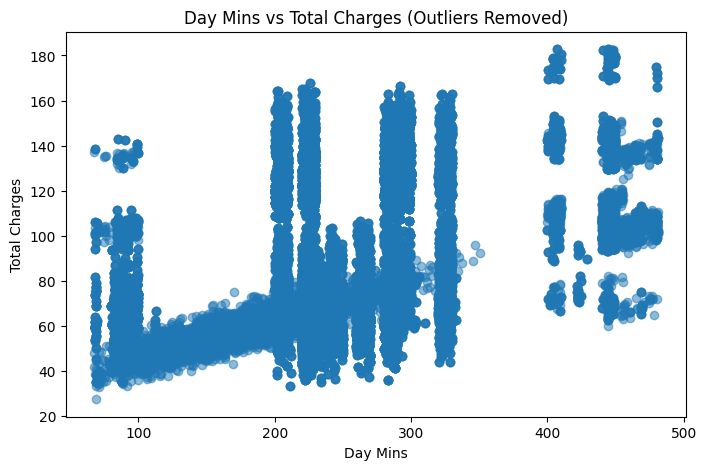

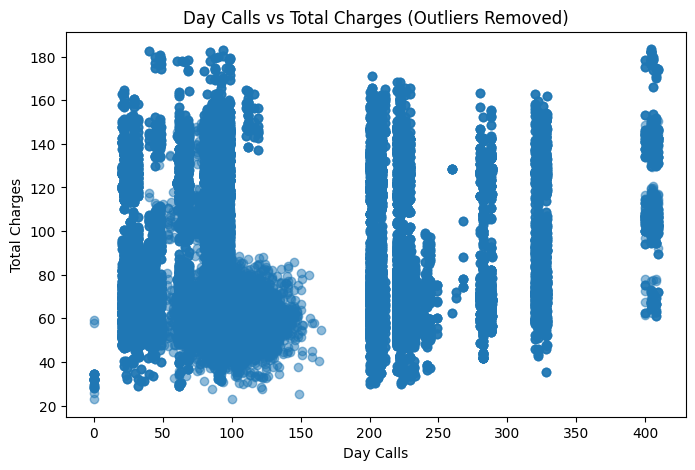

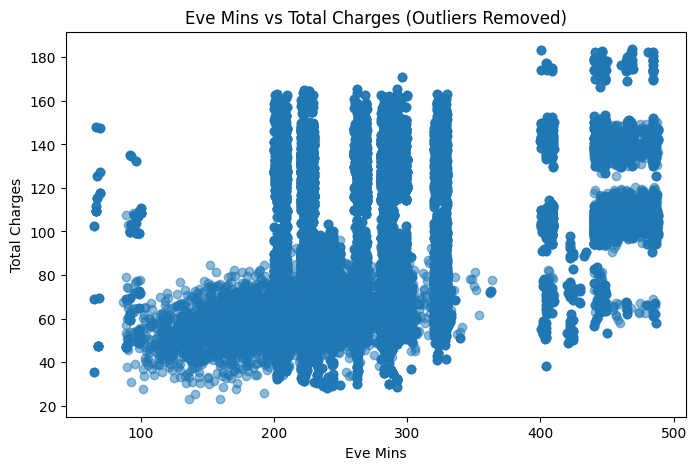

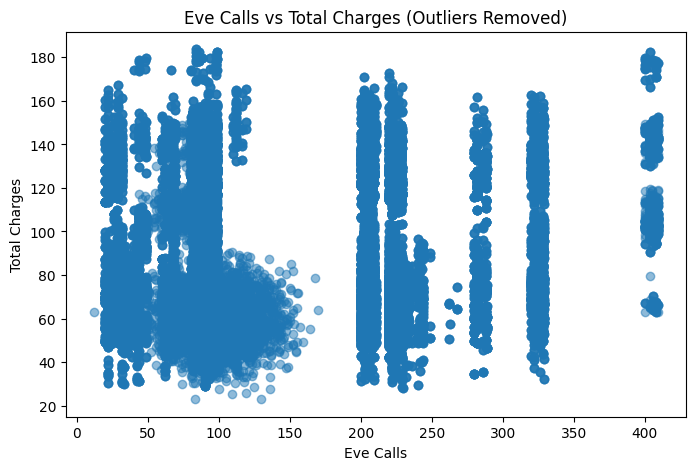

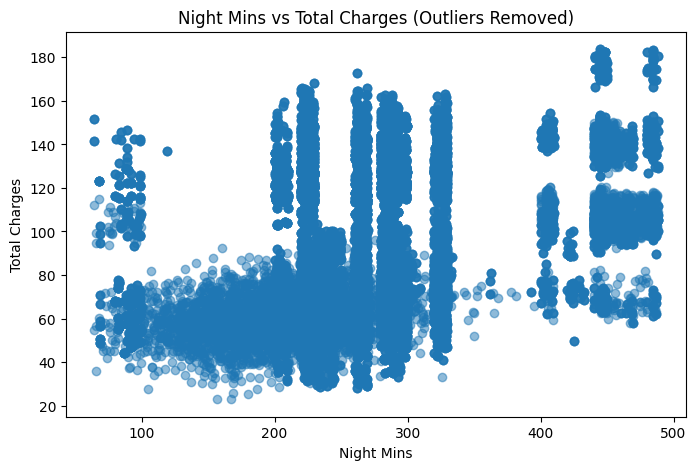

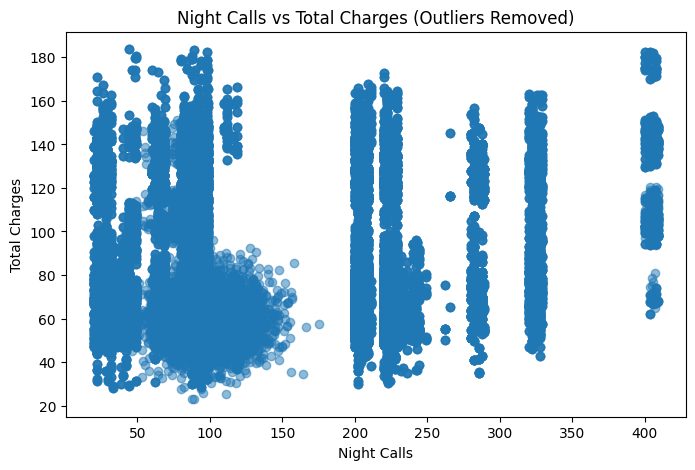

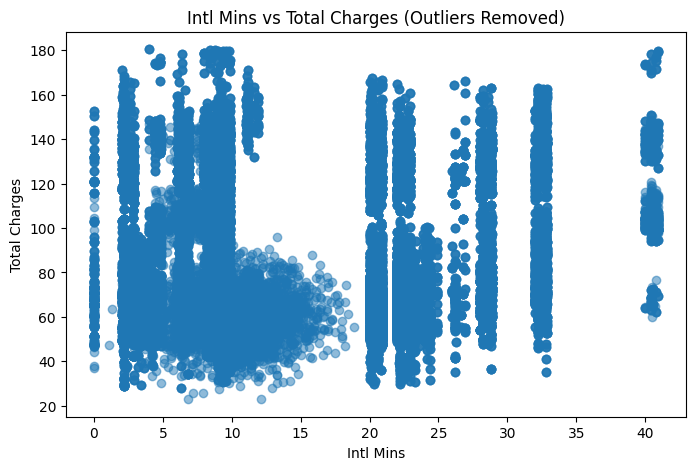

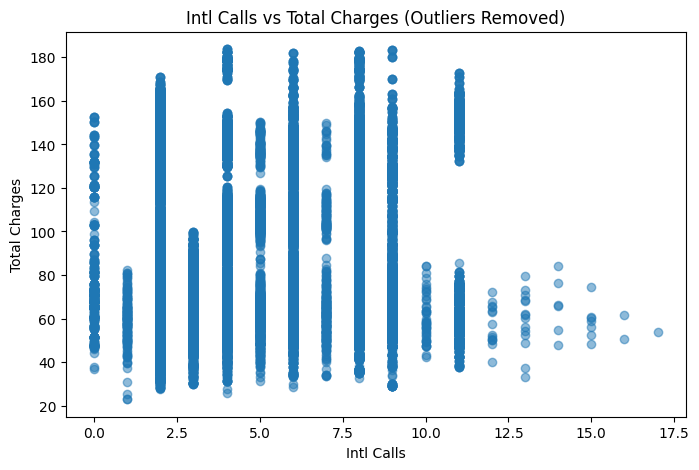

In [65]:
df_cleaned['Total Charges'] = df_cleaned['Day Charge'] + df_cleaned['Eve Charge'] + df_cleaned['Night Charge'] + df_cleaned['Intl Charge']

mins_calls_cols = ['Day Mins', 'Day Calls', 'Eve Mins', 'Eve Calls', 'Night Mins', 'Night Calls', 'Intl Mins', 'Intl Calls']

for col in mins_calls_cols:
    plt.figure(figsize=(8, 5))
    plt.scatter(df_cleaned[col], df_cleaned['Total Charges'], alpha=0.5)
    plt.xlabel(col)
    plt.ylabel('Total Charges')
    plt.title(f'{col} vs Total Charges (Outliers Removed)')
    plt.show()

In [73]:
drop_cols = ['Phone Number','VMail Message','Vmailmessages','CustServ Calls','Churn','Account Length']
df_clust = df.drop(columns=[c for c in drop_cols if c in df.columns])


# Keep only numeric features for clustering
X = df_clust.select_dtypes(include=[np.number])
df_clust.head(3)

,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,Total Charges
0,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,75.56
1,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,59.24
2,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,62.29


In [74]:
# Preprocessing: numeric scaling, categorical encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

X = df_clust.copy()

numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=['object','category','bool']).columns.tolist()

# Exclude 'Phone Number' from categorical features

numeric_transformer = Pipeline(steps=[
    ('imputer', pd.api.types.CategoricalDtype),  # placeholder no-op; we'll handle NA via fillna
    ('scaler', StandardScaler())
])

# Handle missing values explicitly
X[numeric_features] = X[numeric_features].fillna(X[numeric_features].median())
X[categorical_features] = X[categorical_features].fillna('Missing')

categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

X_transformed = preprocess.fit_transform(X)
feature_names = []
feature_names.extend([f'num__{c}' for c in numeric_features])
if len(categorical_features) > 0:
    cat_names = preprocess.named_transformers_['cat'].get_feature_names_out(categorical_features).tolist()
    feature_names.extend(cat_names)

print('Transformed shape:', X_transformed.shape)
len(feature_names)

Transformed shape: (101174, 13)


13

1. Elbow Method (Inertia vs k)

What it shows: This graph plots the inertia (the sum of squared distances of samples to their closest cluster center) against the number of clusters (k).
How to interpret it: As you increase k, the inertia will always decrease (because the data points are closer to more centroids). The "elbow" point is where the rate of decrease sharply changes. This point is often considered a good estimate for the optimal k because adding more clusters beyond the elbow doesn't significantly improve the clustering (reduce inertia). In this graph, there isn't a very clear, sharp elbow, but there's a notable bend around k=3 or k=4.

2. Silhouette Score vs k

What it shows: This graph plots the average silhouette score for all samples against the number of clusters (k). A higher silhouette score indicates that the objects are well matched to their own cluster and poorly matched to neighboring clusters.
How to interpret it: You are looking for the k value that gives the highest silhouette score. A score closer to +1 indicates that the samples are far away from the neighboring clusters. A score of 0 indicates that the samples are on or very close to the decision boundary between two neighboring clusters. A score closer to -1 indicates that the samples might have been assigned to the wrong cluster. In this graph, the silhouette score is highest at k=2 and k=3, and then drops significantly for higher values of k.
Conclusion from these graphs:

Based on these two plots, both the Elbow Method (though not very distinct) and especially the Silhouette Score suggest that a lower number of clusters is more appropriate for this data. The silhouette score is highest for k=2 and k=3, indicating better cluster separation at these values compared to higher k values. The code's selection of best_k_silhouette: 2 is based on this observation.

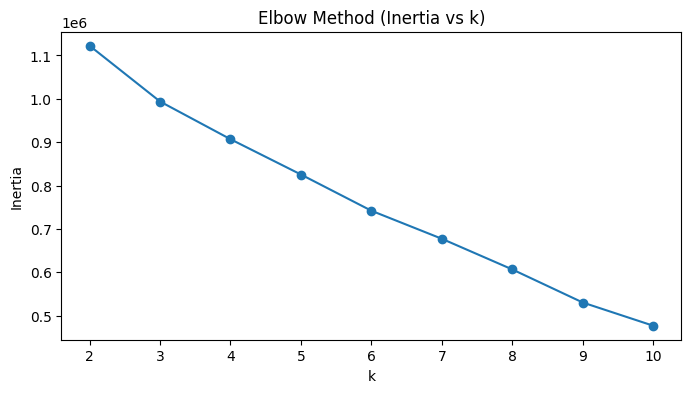

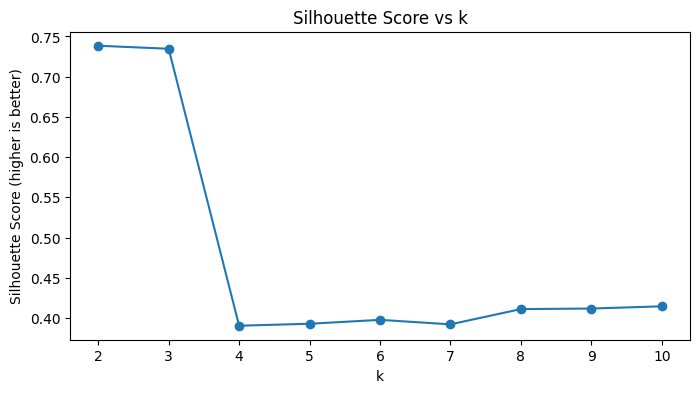

{'best_k_silhouette': 2}


2

In [75]:
# Choose optimal k via elbow and silhouette
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertias = {}
sil_scores = {}
ks = list(range(2, 11))
for k in ks:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = km.fit_predict(X_transformed)
    inertias[k] = km.inertia_
    # For large data, sample for silhouette
    if X_transformed.shape[0] > 5000:
        idx = np.random.RandomState(42).choice(X_transformed.shape[0], 5000, replace=False)
        sil_scores[k] = silhouette_score(X_transformed[idx], labels[idx])
    else:
        sil_scores[k] = silhouette_score(X_transformed, labels)

plt.figure(figsize=(8,4))
plt.plot(list(inertias.keys()), list(inertias.values()), marker='o')
plt.title('Elbow Method (Inertia vs k)')
plt.xlabel('k')
plt.ylabel('Inertia')
# Save and close the plot
# savefig('k_elbow')
# plt.close()
plt.show() # Display the plot

plt.figure(figsize=(8,4))
plt.plot(list(sil_scores.keys()), list(sil_scores.values()), marker='o')
plt.title('Silhouette Score vs k')
plt.xlabel('k')
plt.ylabel('Silhouette Score (higher is better)')
# Save and close the plot
# savefig('k_silhouette')
# plt.close()
plt.show() # Display the plot


# Select k: priority to max silhouette, fallback to elbow kink (simple rule)
best_k = max(sil_scores, key=sil_scores.get)
print({'best_k_silhouette': best_k})

best_k